In [64]:
using Random, Distributions
include("Box_Dirichlet_To_Neumann.jl")

Generate_Output (generic function with 1 method)

# Generate Neumman results for box setup

The top Dirichlet boundary is 
$$u_f(x) = \sum_{l=1}^{N_l}  \frac{\xi_l}{\pi^2 l^2} sin(\pi l x)$$

Assume the wave speed is a constant c,
Consider the Dirichlet boundary $u(x) = u_f(x)$ on the top, and $u(x) = 0$ in all 
other boundaries.
The ouput is a $N_p \times 2 \times 4$ tensor, coordinates and Neumann results on four boundaries.
$N_p$ is the number of points on each edge.

Since the equation is linear, the inputs are $\xi$ vector and the sound wave speed.
```
output_data = D2N(ξ, c, nex, ney)
```

When the source term is $0$, the function is linear with respect to $ξ$.

In [65]:

# Linear combination tests
ne = 20
c = 500.0
nex, ney = ne, ne
ξ1 = rand(Normal(0, 1), 20)

# output_data[:,:, edge_id] = [x ; ∂u/∂n] 
output_data1 = D2N(ξ1, c, nex, ney)


ξ2 = rand(Normal(0, 1), 20)
output_data2 = D2N(ξ2, c, nex, ney)


ξ3 = ξ1 + ξ2
output_data3 = D2N(ξ3, c, nex, ney)

@info norm(output_data3[:,2,:] - (output_data1[:,2,:]  + output_data2[:,2,:] ))



┌ Info: 1.6142602711360966e-14
└ @ Main In[65]:19


# Generate Neumman results for box setup

The top Dirichlet boundary is 
$$u_f(x) = \sum_{l=1}^{N_l}  \frac{\xi_l}{\pi^2 l^2} sin(\pi l x)$$

Assume the wave speed is a constant, give several wave speeds in the array cs
Consider the Dirichlet boundary $u(x) = u_f(x)$ on the top, and $u(x) = 0$ in all 
other boundaries.
The ouput is a $N_p \times N_cN_l \times 4$ tensor, Neumann results on four boundaries.
$N_p$ is the number of points on each edge.

Since the equation is linear, the inputs used to are $\{\frac{1}{\pi^2 l^2} sin(\pi l x))\}_l$.
```
output_data = Generate_Output(cs, N_l, ne, porder)
```

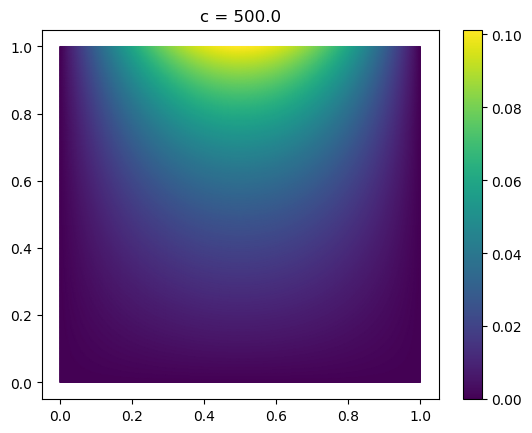

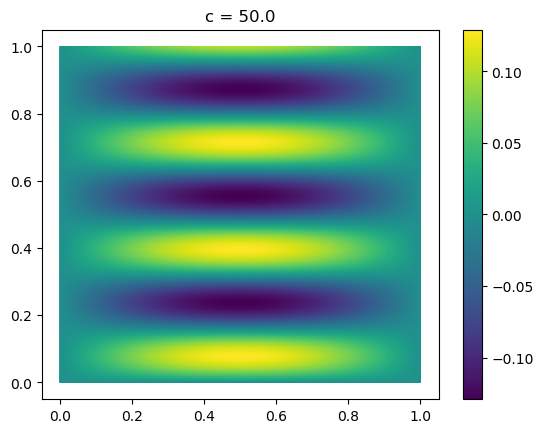

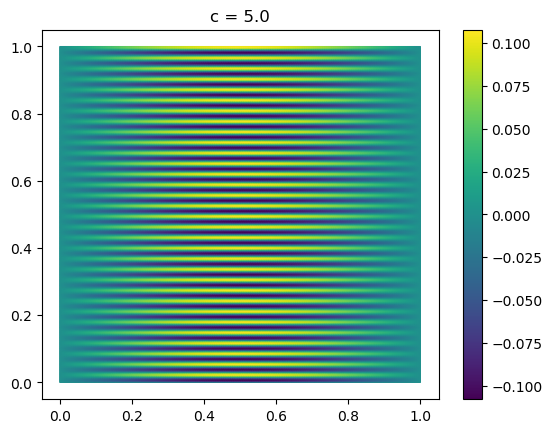

In [66]:

N_l = 20
ne = 200
porder = 2
cs = [500.0;50.0;5.0]

# generate Dirichlet to Neumman results output for differe
output_data = Generate_Output(cs, N_l, ne, porder);



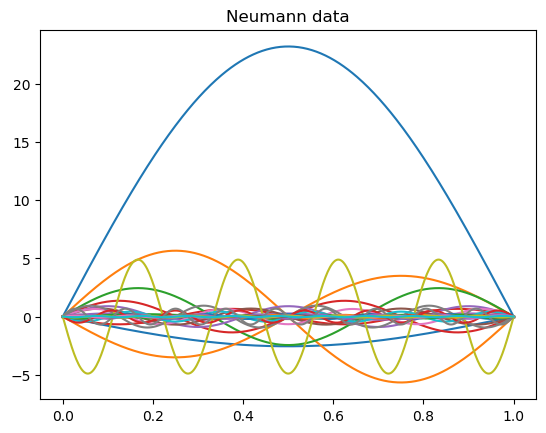

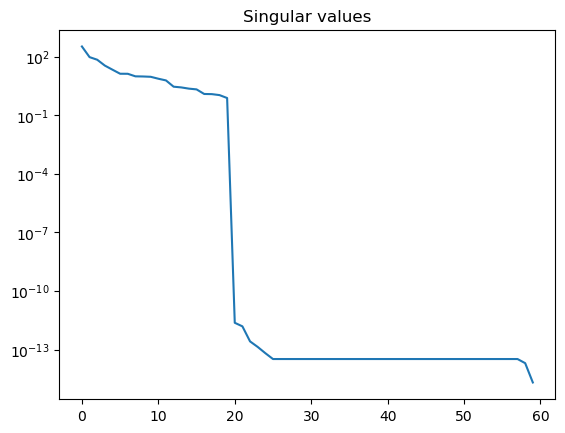

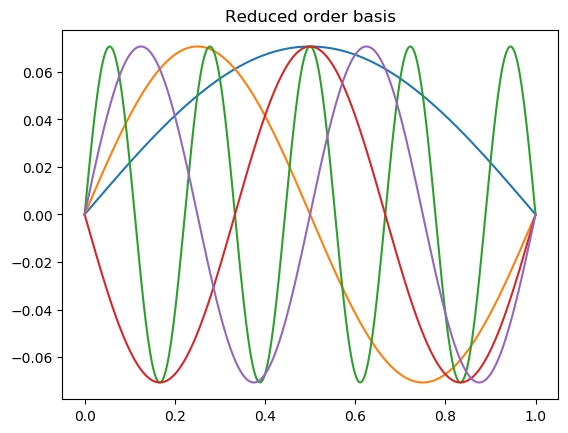

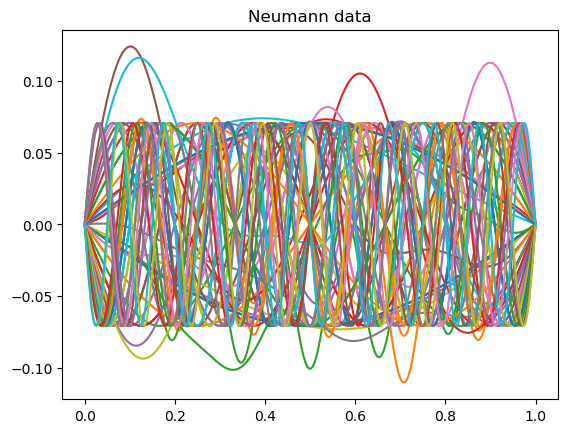

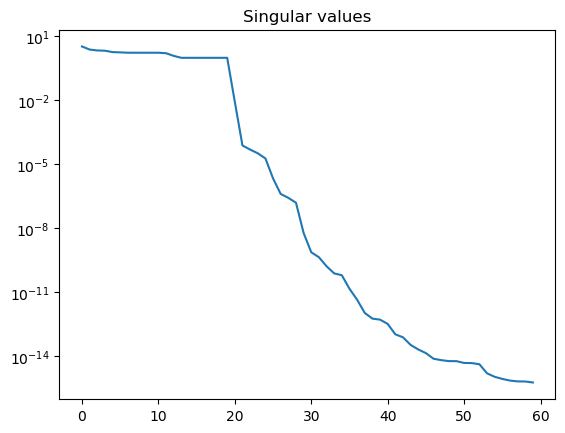

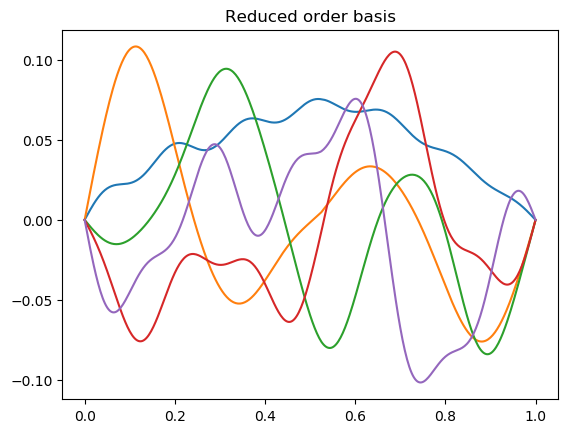

5-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd53b8ad950>
 PyObject <matplotlib.lines.Line2D object at 0x7fd508241910>
 PyObject <matplotlib.lines.Line2D object at 0x7fd508241ad0>
 PyObject <matplotlib.lines.Line2D object at 0x7fd508241c90>
 PyObject <matplotlib.lines.Line2D object at 0x7fd508241e50>

In [67]:
# consider on only the top edge
bc_id = 1
x = LinRange(0, 1, ne*porder+1)
PyPlot.figure()
PyPlot.title("Neumann data")
PyPlot.plot(x, output_data[:,:,bc_id])


PyPlot.figure()
PyPlot.title("Singular values")
U,Σ,V = svd(output_data[:,:,bc_id])
PyPlot.semilogy(Σ)

PyPlot.figure()
trunc = 5
PyPlot.title("Reduced order basis")
PyPlot.plot(x, U[:, 1:trunc])

# normalized the ouput
output_data_normalized = copy(output_data)
for i = 1:size(output_data, 2)
    for j = 1:size(output_data, 3)
        output_data_normalized[:,i,j] .= output_data_normalized[:,i,j]/norm(output_data_normalized[:,i,j])
    end
end

PyPlot.figure()
PyPlot.title("Neumann data")
PyPlot.plot(x, output_data_normalized[:,:,bc_id])

PyPlot.figure()
PyPlot.title("Singular values")
U,Σ,V = svd(output_data_normalized[:,:,bc_id])
PyPlot.semilogy(Σ)

PyPlot.figure()
PyPlot.title("Reduced order basis")
trunc = 5
PyPlot.plot(x, U[:, 1:trunc])

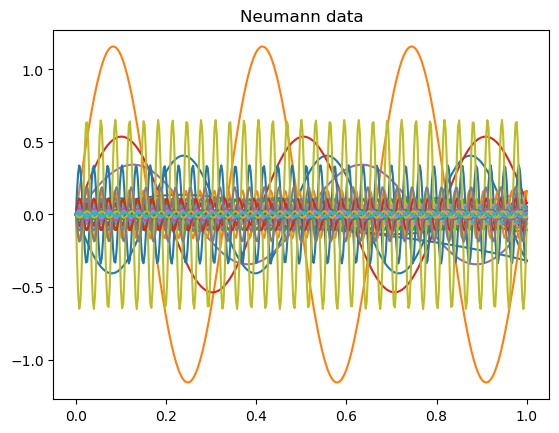

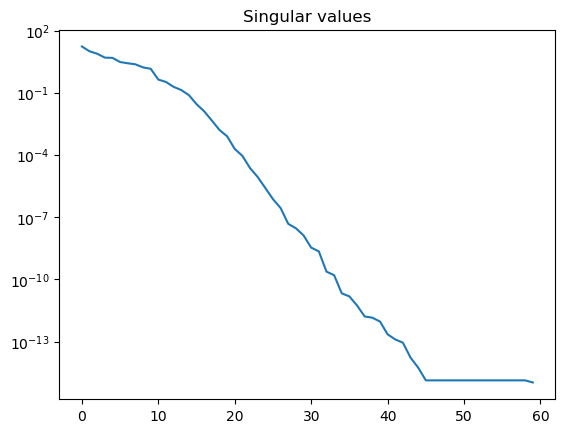

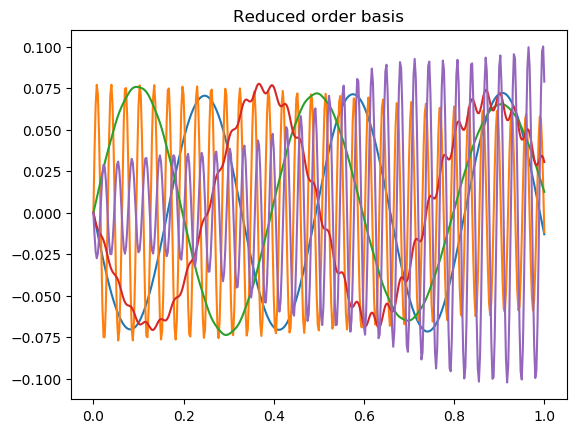

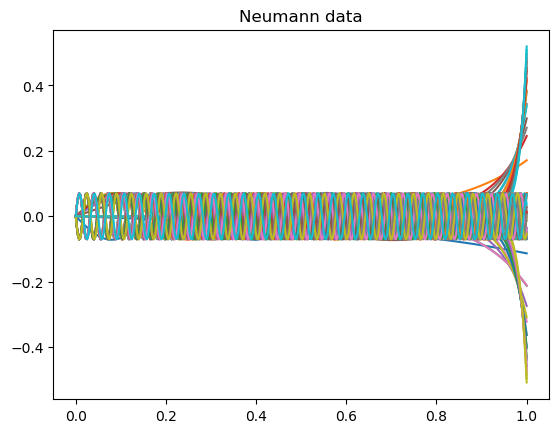

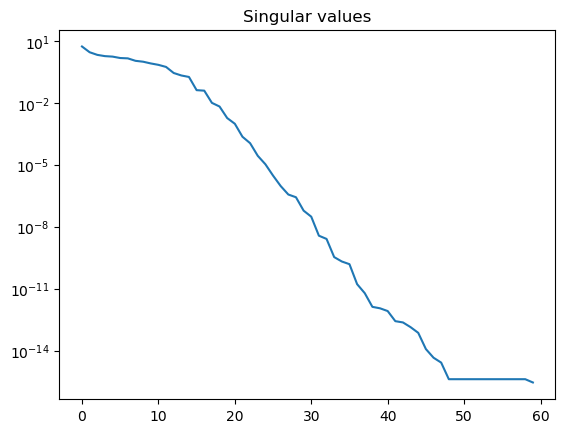

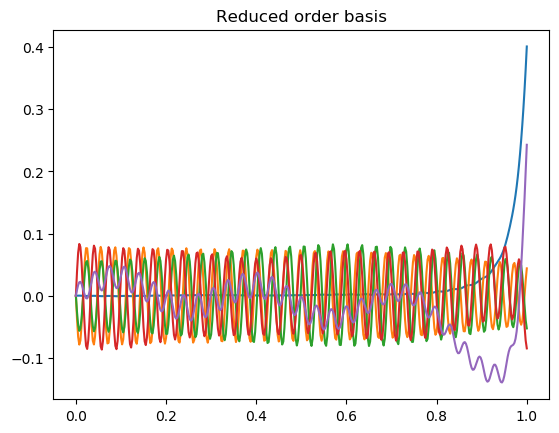

5-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd5c2b69f10>
 PyObject <matplotlib.lines.Line2D object at 0x7fd5c2b7ced0>
 PyObject <matplotlib.lines.Line2D object at 0x7fd5dee150d0>
 PyObject <matplotlib.lines.Line2D object at 0x7fd5dee15290>
 PyObject <matplotlib.lines.Line2D object at 0x7fd5dee15450>

In [68]:
# consider on only the top edge
bc_id = 2
x = LinRange(0, 1, ne*porder+1)
PyPlot.figure()
PyPlot.title("Neumann data")
PyPlot.plot(x, output_data[:,:,bc_id])


PyPlot.figure()
PyPlot.title("Singular values")
U,Σ,V = svd(output_data[:,:,bc_id])
PyPlot.semilogy(Σ)

PyPlot.figure()
trunc = 5
PyPlot.title("Reduced order basis")
PyPlot.plot(x, U[:, 1:trunc])

# normalized the ouput
output_data_normalized = copy(output_data)
for i = 1:size(output_data, 2)
    for j = 1:size(output_data, 3)
        output_data_normalized[:,i,j] .= output_data_normalized[:,i,j]/norm(output_data_normalized[:,i,j])
    end
end

PyPlot.figure()
PyPlot.title("Neumann data")
PyPlot.plot(x, output_data_normalized[:,:,bc_id])

PyPlot.figure()
PyPlot.title("Singular values")
U,Σ,V = svd(output_data_normalized[:,:,bc_id])
PyPlot.semilogy(Σ)

PyPlot.figure()
PyPlot.title("Reduced order basis")
trunc = 5
PyPlot.plot(x, U[:, 1:trunc])